## Plotting Sigmoid Function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

$S_{w, b}(x) = \frac{1}{1 + e^{-(wx + b)}}$

In [2]:
def sigmoid(x, w, b):
    return 1 / (1 + np.exp(-(w * x + b)))

In [3]:
sigmoid(1, 0.5, 0)

0.6224593312018546

In [4]:
w = 0.9
b = 0.1
X = np.linspace(-10, 10, 100)
Y = sigmoid(X, w, b)

In [5]:
type(X), type(Y)

(numpy.ndarray, numpy.ndarray)

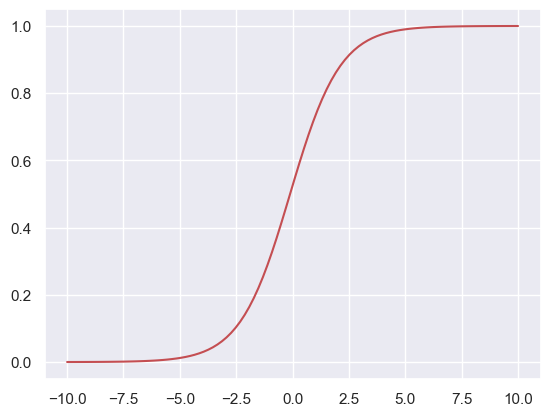

In [6]:
plt.plot(X, Y, color ="r")
plt.show()

$S_{w_1, w_2, b}(x_1, x_2) =\frac{1}{1 + e^(-(w_1x_1 + w_2x_2 + b))}$

In [7]:
def sigmoid_2d(x1, x2, w1, w2, b):
    return 1 / (1 + np.exp(-(w1 * x1 + w2 * x2 + b)))

In [8]:
sigmoid_2d(1, 0, 0.5, 0, 0)

0.6224593312018546

In [9]:
from mpl_toolkits import mplot3d

In [10]:
X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 80)

XX1, XX2 = np.meshgrid(X1, X2)
print(X1.shape, X2.shape, XX1.shape, XX2.shape)

(100,) (80,) (80, 100) (80, 100)


In [11]:
w1 = 0.5
w2 = 0.5
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

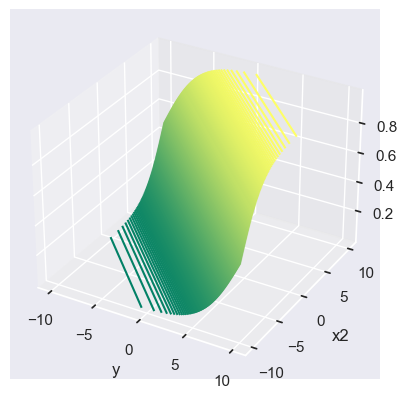

In [12]:
fig = plt.figure()
ax = plt.axes(projection = "3d")
ax.contour3D(XX1, XX2, Y, 200, cmap = 'summer')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_xlabel('y')
plt.show()

### Computing Loss

In [13]:
w_unknown = 0.5
b_unknown = 0.25
X = np.random.random(25) * 20 - 10
Y = sigmoid(X, w_unknown, b_unknown)

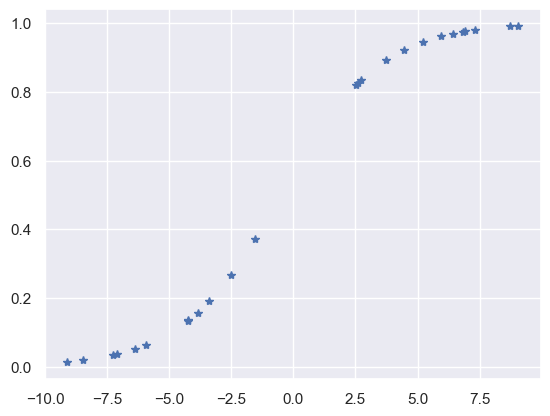

In [14]:
plt.plot(X, Y, '*');

In [15]:
def calculate_loss(X, Y, w_est, b_est):
    loss = 0
    for x, y in zip(X, Y):
        loss += (y - sigmoid(x, w_est, b_est)) ** 2
    return loss

In [16]:
W = np.linspace(-1, 1, 200)
B = np.linspace(-1, 1, 200)

WW, BB = np.meshgrid(W, B)

Loss = np.zeros(WW.shape)

In [17]:
WW.shape

(200, 200)

In [18]:
for i in range(WW.shape[0]):
    for j in range(WW.shape[1]):
        Loss[i, j] = calculate_loss(X, Y, WW[i, j], BB[i, j])

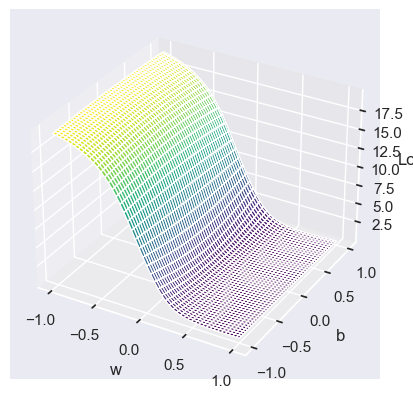

In [19]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_surface(WW, BB, Loss,  cmap = "viridis")
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss');

## Sigmoid Neuron Class

In [24]:
class SigmoidNeuron:

    def __init__(self) -> None:
        self.w = None
        self.b = None 
 
    def perceptron(self, x):
        return np.dot(x, self.w.T) + self.b
    
    def sigmoid(self, x):
        return 1.0 / (1.0 + np.exp(-x))
    
    def grad_w(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred) * x
    
    def grad_b(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred)
    

    def fit(self, X, Y, epochs = 10, learning_rate = 1, initialize = False):

        if initialize:
            self.w = np.random.randn(1, X.shape[1])
            self.b = 0

        for i in range(epochs):
            dw = 0
            db = 0

            for x, y in zip(X, Y):
                dw += self.grad_w(x, y)
                db += self.grad_b(x, y)

            self.w -= learning_rate * dw
            self.b -= learning_rate * db

### Fitting for Toy Data

In [48]:
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, 4], [1, 5]])
Y = [1, 1, 1, 0, 0, 0]

In [49]:
sn = SigmoidNeuron()
sn.fit(X, Y, learning_rate= 0.25, initialize= True)

In [50]:
print(sn.w, sn.b)

[[ 1.6026421  -1.01210919]] [0.17490867]


In [51]:
def plot_sn(X, Y, sn):
    X1 = np.linspace(-10, 10, 100)
    X2 = np.linspace(-10, 10, 100)
    XX1, XX2 = np.meshgrid(X1, X2)
    YY = np.zeros(XX1.shape)
    for i in range(X2.size):
        for j in range(X1.size):
            val = np.asarray([X1[j], X2[i]])
            YY[i, j] = sn.sigmoid(sn.perceptron(val))

    plt.contourf(XX1, XX2, YY, cmap = "summer", alpha = 0.6)
    plt.scatter(X[:, 0], X[:, 1], c = Y, cmap = 'binary')
    plt.plot()

In [52]:
sn.fit(X, Y, learning_rate= 0.25, initialize= True, epochs= 50)

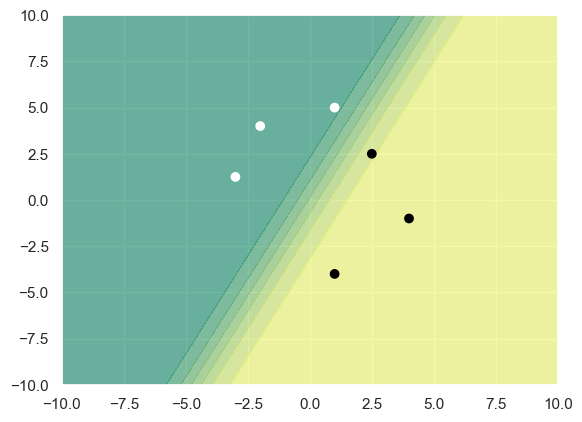

In [53]:
plot_sn(X, Y, sn)